In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[0.0, 0.0, 0.6253908692933083, 3.314571607254534, 42.589118198874296, 39.89993746091307, 12.445278298936834, 1.125703564727955, 0.0]


Text(0,0.5,'number of wine')

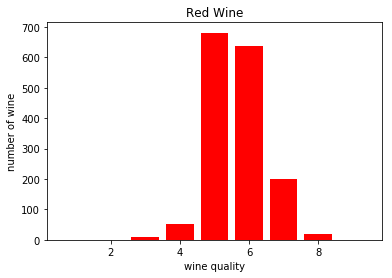

In [16]:
redData = pd.read_csv('winequality-red.csv',sep=';')
yRed = redData['quality']
redCount = [0]*9
for i in range(len(yRed)):
    redCount[yRed[i]-1]+=1
plt.title('Red Wine')
plt.bar(range(1,10),redCount, color='r'); print ([i/sum(redCount)*100 for i in redCount])
plt.xlabel('wine quality'); plt.ylabel('number of wine')

In [17]:
whiteData = pd.read_csv('winequality-white.csv',sep=';')
yWhite = whiteData['quality']
whiteCount = [0]*9
for i in range(len(yWhite)):
    whiteCount[yWhite[i]-1]+=1
#plt.bar(range(1,10),whiteCount); print ([i/sum(whiteCount)*100 for i in whiteCount])
#print(sum(redCount),sum(whiteCount))

In [4]:
wineData = pd.concat([redData,whiteData])

In [5]:
wineData.reset_index()
wineData.reset_index(drop = True, inplace = True)

In [62]:
y = redData['quality']; X=redData; del X['quality'];

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=33) 

In [8]:
linearModel = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=8)

In [9]:
result = linearModel.fit(X,y)#(xTrain,yTrain)

In [10]:
result.coef_, result.intercept_

(array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
        -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
        -4.13653144e-01,  9.16334413e-01,  2.76197699e-01]), 21.96520844945202)

In [11]:
yHat = result.predict(X)

Text(0,0.5,'expected quality')

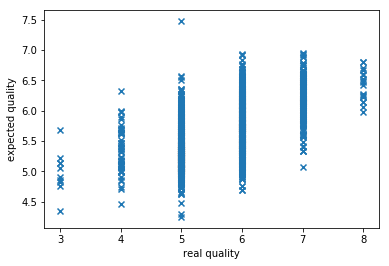

In [12]:
plt.scatter(y, yHat, marker='x')
plt.xlabel('real quality');plt.ylabel('expected quality')

In [63]:
yTrans = []
for i in range(len(y)):
    if y[i]<8 : yTrans.append(0)
    else: yTrans.append(1)


In [64]:
column =list(X.columns);column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Text(0,0.5,'wine quality')

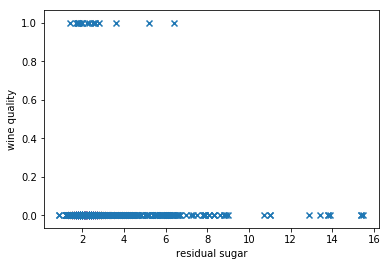

In [82]:
i=3
plt.scatter(X[column[i]],yTrans,marker='x')
plt.xlabel(column[i]);plt.ylabel('wine quality')